# <center> **Лекция 7:** Компьютерное зрение. Задача Segmentation. U-Net Architecture. </center>
----
<br>
</br>

<center> <img src=./../src/imgs/lec9intr.png> </center>

<br>
</br>

## __План на сегодня:__

----
### 1. __Определение задачи сегментации изображения в компьютерном зрении. Semantic и Instance Segmentation__
### 2. __Где применяется Image Segmenetation.__
### 3. __Метрики для оценки качества алгоритмов сегментации изображения.__
### 4. __Базовые и продвинутые архитектуры для решения задач сегментации.__
### 5. __Функции потерь.__
### 6. __Фреймворки, библиотеки, датасеты для обучения и решения задач сегментации изображения.__
### 7. __Q&A.__

# Задача сегментации в CV. Semantic vs Instance Segmentation

<br>
</br>

В CV задача сегментации изображения - это задача разделения фрейма (изображения) на несколько сегментов (множество пикселей, суперпикселей). Цель решения задачи - упростить или изменить представление изображения, чтобы с его было проще модифицировать и/или анализировать. Обычно в самом классическом смысле слова, сегментация используется для того, чтобы выделить объекты и их границы (линии, кривые, фон) на фреймах.

Задачу можно свести к примитивному решению - к процессу присвоения сегментационных меток каждому пикселю изображения, где пиксели с одинаковыми метками образуют единый сегмент и соответственно имеют общие количественные и визуальные признаки (характеристики).

<br>
</br>

__Сементическая и Instance Сегментации__

<br>
</br>

<center> <img src=./../src/imgs/semanticvsinstancesegmentation.png> </center>

<br>
</br>

* В __semantic segmentation__ - все объекты одного и того же типа классифицированны (сегментированны) меткой одного и того же класса. То есть, суть в том, что если мы проводим семантическую сегментацию, то мы решаем такую задачу классификации каждого пискселя из картинки на наше множество классов (Все люди относятся к классу люди и поэтому весь класс рамечен одним цветом).
* В __instance segmentation__ - все объекты на изображении имеют свою отдельную метку класса.

<br>
</br>

____

# __Зачем нам нужна задача Image Segmentation и где это все применяется__

----

<br>
</br>

1. __Autonomous Driving Vehicles__

<br>
</br>

<center> <img src=./../src/imgs/autopilot.png> </center>

<br>
</br>

2. __Background Replacement на изображениях__

<br>
</br>

<center> <img src=./../src/imgs/backgroundreplacement.png> </center>

<br>
</br>

3. __Image Relighting (2D/3D)__

<br>
</br>

<center> <img src=./../src/imgs/imagerelightening.png> </center>

<br>
</br>

4. __Medical Image Segmentation (2D - U-Net / 3D - V-Net )__

<br>
</br>

<center> <img src=./../src/imgs/medicalimagesegmentation.png> </center>

<br>
</br>

5. [__Fashion Industry__](https://github.com/switchablenorms/DeepFashion2)

<br>
</br>

<center> <img src=./../src/imgs/deepfashn.png> </center>

<br>
</br>

6. __Satellite Image Processing__

<br>
</br>

<center> <img src=./../src/imgs/satelliteimgprocessing.png> </center>

<br>
</br>

7. [__Image Editing, Image Inpainting__](https://github.com/switchablenorms/CelebAMask-HQ)

<br>
</br>

<center> <img src=./../src/imgs/imageediting.png> </center>

<br>
</br>

____

# __Метрики для оценки качества работы алгоритмов сегментации__

----

<br>
</br>

1. __Pixel Accuracy__

<br>
</br>

Так как у нас задача сегментации каждого пикселя и каждому пикселю необходимо присвоить метку сегмента (класса), то мы можем посчитать Pixel Accuracy. То есть % пикселей, которые классифицированны верно по сравнению с ground truth (обучающим) набором пикселей. Недостаток такого метода - __Class Imbalance Issue__ например когда у нас на картинке очень много фона (95% будет классифицированно как верно).

<br>
</br>

<center> <img src=./../src/imgs/pixelacc.png> </center>

<br>
</br>

2. [__Intersection over Union (IoU)__](https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2)

<br>
</br>

<center> <img src=./../src/imgs/iou_1.png> </center>
<center> <img src=./../src/imgs/iou_2.png> </center>

<br>
</br>

Самая популярная метрика для многих задач CV. В контексте сегментации немного иной расчет с небольшими вариациями:

Считаем изначально метрики для кораблей на изображении (пример изображения выше):
* Area of Overlap = 0
* Area of Union = (5 + 0) - 0 = 5
* Area of Overlap / Area of Union = 0%

Считаем Backgroung:
* Area of Overlap = 95
* Area of Union = (95 + 100) - 95 = 100
* Area of Overlap / Area of Union = 95%

Считаем Mean IoU:
* Mean IoU = (Ships + Background) / 2 = (0% + 95%) / 2 = 47.5%


Смысл метрики сводится к:

### $IoU = \frac {TP}{TP + FP + FN}$

<br>
</br>

3. [__DICE или Dice Similarity Coefficient__](https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2)

<br>
</br>

<center> <img src=./../src/imgs/dice_1.png> </center>
<center> <img src=./../src/imgs/dice_2.png> </center>

<br>
</br>

Считается как __2 * Area of Overlap / total number of pixels на двух изображениях__:

* Предположим что общее количество пикселей для двух изображений равно 200.
* Ships: Area of Overlap = 0 или (2 * Area of Overlap) / (total pixels combined) = 0 / (5 + 0) = 0
* Background: Area of Overlap = 05 или (2 * Area of Overlap) / (total pixels combined) = 95 * 2 / (100 + 95) = 0.97
* Dice = (Ships + Background)/2 = (0 + 97)/2 = 48.5%

Смысл метрики сводится к:

### $Dice = \frac {2 \times TP}{(TP + FP} + (TP + FN)$


Пример расчета:

Предположим, что у нас есть бинарное изображение размером 5х5 пикселей и мы хотим сравнить истинную маску с предсказанной маской:

#### Ground Truth:

<br>
</br>

\begin{equation}
   \begin{vmatrix} 
   0 & 0 & 1 & 1 & 0 \\
   0 & 1 & 1 & 1 & 0 \\
   0 & 1 & 1 & 1 & 0 \\
   0 & 1 & 1 & 1 & 0 \\
   0 & 0 & 0 & 0 & 0 \\
   \end{vmatrix} 
\end{equation}

<br>
</br>

#### Predicted Mask

<br>
</br>

\begin{equation}
   \begin{vmatrix} 
   0 & 0 & 0 & 1 & 1 \\
   0 & 0 & 1 & 1 & 1 \\
   0 & 1 & 1 & 1 & 0 \\
   0 & 1 & 1 & 0 & 0 \\
   0 & 0 & 0 & 0 & 0 \\
   \end{vmatrix} 
\end{equation}

Расчитаем коэффициент DICE:
1. Подсчитаем пересечение $|X \cap Y| = 10$ то есть 10 пикселей, где и истинная и предсказанная маски равны 1
2. Подсчитываем количество единиц в каждой маске: $|X| = 12$ и $|Y| = 11$
3. Подставляем в формулу и получаем:

#### $DSC = ({2 * 10}) / ({12 + 11}) = {20}/{23} = 0.87$

Итого получаем что коэффициент довольно высок, что указывает на высокую степень совпадения между истинной и предсказанной масками.

____

# __Архитектуры__

----

<br>
</br>

__Semantic Segmentation: Sliding Window__

<br>
</br>

<center> <img src=./../src/imgs/slidingwindonw.png> </center>

<br>
</br>

Самый простой подход - берем формируем патчи и классифицируем центр патча (то есть пиксель) двигаясь по всей картинки и подавая в патч в классификатор из сверток. Но такой подход не эффективный так как мы не способны правильно классифицировать такой пиксель не видя глобальный контекст, соответственно будет возникать огромное количество false positives что будет мешать нам решить задачу наиболее точным спопособом.

<br>
</br>

__Semantic Segmentation: Convolution__

<br>
</br>

<center> <img src=./../src/imgs/semanticconvolution.png> </center>

<br>
</br>

Следующая идея - взять просто целую картинку на входе и использовать сверточный пайплайн и предсказать картинку такого же размера с соответственными сегментами для классов. Но тут опять не срослось с таким подходом как по качеству так и по эффективности, так как архитектура классифицкационной CNN уменьшает размерность нашего признакового пространства и чаще всего сама архитектура глубока для того чтобы добиться качества. И поэтому мы тут не можем получить картинку той же размерности что и на входе и как-то оптимизировать работу в рамках текущей архитектуры в разрезе решения задачи Sematic Segmentation.

<br>
</br>

__Semantic Segmentation: Fully Convolutional NNs__

<br>
</br>

<center> <img src=./../src/imgs/fully_convols_segment.png> </center>

<br>
</br>

Пришли экспериментально к идее, что почему бы просто не воспользоваться только сверточными слоями без операций даунсэмплинга для того чтобы сделать предикты для всех пикселей разом и сохранить еще изображение, которое равнялось бы входному изображения (высота х ширина х глубина).

Существенная проблема в такой архитектуре - что часть архитектуры отвечающая за сверточные операции, потребляет огромное количество памяти, делает огромное количество расчетов и хранит много информации. Надо как-то оптизироваться.


__Идеи?__

__Semantic Segmentation: Fully Convolutional NNs with Autoencoder alike block __


<br>
</br>

<center> <img src=./../src/imgs/fullyconvolutionalwithautoencoderalike.png> </center>

<br>
</br>

Можно взять и заменить все сверточные операции на архитектуру подобную Автоэнкодеру (помни по HourGlass архитектуру). Берем входную картинку, проводим даунсэмплинг, вынимаем признаки, проводим апсэмлинг и получаем карты активаций которые представляют с собой тепловые карты, соединям и получаем сегментированную картинку на выходе.

<br>
</br>

Какие есть варианты апсемплинга (unpooling'a):

<br>
</br>

1. Вариант с интерполяцией или __Neares Neghbor__:

```
torch.nn.MaxUnpool2d(kernel_size, stride=None, padding=0)
```

<br>
</br>

<center> <img src=./../src/imgs/interpolation.png> </center>

<br>
</br>

2. Bed of Nails:

<br>
</br>

<center> <img src=./../src/imgs/bedofnails.png> </center>

<br>
</br>

3. Max Unpooling:

Более умный подход, когда берем матрицу - делаем Max Pooling и созраняем индексы. Далее когда делаем анпуллинг то значения подставляются под те индексы, откуда были взяты соответствующие значения во время операции пуллинга:

<br>
</br>

<center> <img src=./../src/imgs/Maxunpooling.png> </center>

<br>
</br>

4. Learnable Upsampling: Transposed Convolutions:

* Есть матрица на входе
* Такой матрице соответствуют фильтры (kernels) которые обучаются во время тренировки модели
* Берем и умножаем каждый элемент входной матрицы на фильтр и получаем новые значения
* Соединяем все в одну матрицу и получаем апсэмпл изображения

<br>
</br>

<center> <img src=./../src/imgs/leanableUpsampling.png> </center>

<br>
</br>


Стоит помнить, что такой метод генерит [checkerboard артифакты](https://distill.pub/2016/deconv-checkerboard/) и такой подход будет давать вам много шума для задачи повышения качества изображения.


<br>
</br>



# __Популярная архитектура U-Net (то с чем мы будем работать сегодня)__

<br>
</br>

<center> <img src=./../src/imgs/unet_arch.png> </center>

<br>
</br>

О чем стоит помнить при работе с задачей сегментации:
1. Размерность и структура объектов в исходном изображении должна оставаться такой же как и сегментированный выход из алгоритма (М = М).
2. Если бы будем использовать Fully Convolutional NNs то нам удастся получить одинаковое изображение по размерности как на входе так и на выходе. 

<br>
</br>

Все эти 2 момента помогает соблюсти архитектура U-Net.
В чем идея - skip connections позволяют градиентам более лучше оптимизироваться плюс вся информация отбирается не только с инпута но и во время препроцессинга (разные размеры изображений).

<br>
</br>

Как устроена архитектура:

<br>
</br>

1. В левой части архитектуры - изображение проходит через множественные сверточные слои и размер исходного изображения постепенно сжимается (обычно на каждом слое стараются сжимать изображение в 2 раза), но количество каналов в каждом слое на выходе пропорционально увеличивается.
2. В правой части происходит обратный процесс - мы апскейлим (масштабируем) изображение возвращая его к исходной форме по высоте и ширине, но с таким количеством каналов, сколько существует классов. Кроме того, при апскейлинге мы также испльзуем информацию из соответствующих слоев из левой части архитектуры, которые мы получаем при помощи скип конекшенов. Это позволяет сохранить глобальный контекст, структуру и объекты исходного изображения без большой потери информации. 
3. Таким образом архитектура учится сохранять структуру и форму объектов исходного изображения, используя свертки для предсказания классов соответствующих каждому пикселю изображения. На выходе мы имеем столько каналов, сколько классов хотим предсказать.



[Реализация Keras](https://github.com/petrosgk/Kaggle-Carvana-Image-Masking-Challenge/blob/master/model/u_net.py)


<br>
</br>

Реализация апскейлинга происходит путем использования метода `nn.ConvTranspose2d` который на вход принимает количество каналов, количество выходных каналов, ядро и страйд. 


<br>
</br>

__Дотренировка U-Net__

<br>
</br>

<center> <img src=./../src/imgs/Pretrained_unet.png> </center>

<br>
</br>

Веса с энкодера могут использовать для целей дотренировки своей модели.

[Segmenation Models - SMP](https://github.com/qubvel/segmentation_models)


<br>
</br>


# Какие у вас еще есть варианты для сегментации из архитектур (что вы должны иметь в виду): 


[__Популярная архитектура V-Net__](https://arxiv.org/pdf/1606.04797.pdf)

<br>
</br>

<center> <img src=./../src/imgs/vnet_arch.png> </center>

<br>
</br>

Реализована для 3D изображений и ничего координально не поменялось с U-Net только работаем с 3-х канальными свертками. Весь процесс тотже.

<br>
</br>

[__Архитектура Tiramisu__](https://arxiv.org/pdf/1611.09326.pdf)

<br>
</br>

<center> <img src=./../src/imgs/tiramisu.png> </center>

<br>
</br>

Под капотом реализована идея [Dense Block сверток](https://arxiv.org/pdf/1608.06993.pdf) и она схематично заключается в следующем:

<br>
</br>

<center> <img src=./../src/imgs/denseblockconvs.png> </center>

<br>
</br>


[__Архитектура LinkNet__](https://arxiv.org/pdf/1707.03718.pdf)

<br>
</br>

<center> <img src=./../src/imgs/linknet.png> </center>

<br>
</br>

Главная идея заключается в "сложении" входных трансформаций вместо конкатенации блоков:

<br>
</br>

<center> <img src=./../src/imgs/linknettransf.png> </center>

<br>
</br>

[__Архитектура FPN: Unified Architecture for Instance and Semantic Segmentation__](http://presentations.cocodataset.org/COCO17-Stuff-FAIR.pdf)

<br>
</br>

<center> <img src=./../src/imgs/fpnarch.png> </center>

<br>
</br>

* В Качестве CNN бэкенда - ResNetXt152
* Быстрее и эффективность скорость работы и использования ресурсов
* FPN block может использоваться еще и для задач object recognition
* Используется в hollictic подходах для Pose estimation (на каждый уровень своя точка)

Суть заключается в новом подходе - FPN блоке:

<br>
</br>

<center> <img src=./../src/imgs/fpnblock.png> </center>

<br>
</br>

[__Архитектура Pyramid Scene Parsing Network (PSPNet)__](https://arxiv.org/pdf/1612.01105.pdf)

<br>
</br>

<center> <img src=./../src/imgs/pspnet.png> </center>

<br>
</br>

* CNN бэкенд - ResNet101
* Использует блок Pyramid Pooling
* Похожа на гугловскую архитектуру [DeepLab](https://github.com/google-research/deeplab2)

<br>
</br>

Блок Pyramid Pooling:

<br>
</br>

<center> <img src=./../src/imgs/pyramidpooling.png> </center>

<br>
</br>

____

# _Loss Functions._

----

1. __Pixel Wise Softmax with Cross Entropy:__
2. __Focal Loss__
3. __Dice Loss__
Лучшая метрика которую используют чаще всего, так как она предназначена для сильно несбалансированных классов. Как она рассчитывается:

<br>
</br>

### $Dice Loss = \frac {2 \sum_{i}^{N} p_ig_i}{\sum_{i}^{N} p_{i}^{2} + \sum_{i}^{N} g_{i}^{2}}$

<br>
</br>

p - predicted пиксель
g - ground truth пиксель

Функция потерь будет выглядить следующим образом:

<br>
</br>

<center> <img src=./../src/imgs/diceloss.png> </center>

<br>
</br>

____

# _Датасеты для обучения:._

----

1. __COCO__
2. __PASCAL VOC__
3. [__The CityScapes Dataset__](https://www.cityscapes-dataset.com/)
4. [__ADE20K__](https://groups.csail.mit.edu/vision/datasets/ADE20K/)

____

# _Фреймворки и библиотеки:._

----

__Instance Segmentation__:

1. [__DETECTRON2__](https://github.com/facebookresearch/detectron2)

__Semantic Segmentation__:
2. [DeepLab](https://github.com/tensorflow/models/tree/master/research/deeplab)
3. [HuggingFace Transformers for Segmentation](https://huggingface.co/docs/transformers/tasks/semantic_segmentation)
4. [YOLO Segmentation](https://docs.ultralytics.com/tasks/segment/)

### Реализуем семантическую сегментацию с нуля при помощи архитектуры U-net:

In [20]:
import torch.cuda
from torch_snippets import *
from torchvision import transforms
import torch.nn as nn
from sklearn.model_selection import train_test_split
import os
from torch.utils.data import Dataset, DataLoader, TensorDataset
from pathlib import Path
import cv2

import warnings
warnings.filterwarnings("ignore")

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [21]:
# Определим функцию которая будет отвечать за трансформацию и аугментацию (пока нормализацию) датасета 
transforms_imgs = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [22]:
# Теперь нам необходимо определить и расписать класс датасета, который мы будем использовать для того, чтобы решить задачу сегментации

class SegData(Dataset):
    def __init__(self, split):
        self.items = stems(f'./../data/segmentation/images_prepped_{split}') 
        self.split = split
    
    def __len__(self):
        return len(self.items)
    
    def __getitem__(self, ix):
        """
        В данном методе мы будем ресайзить как картинку (наш инпут) так и маску (аутпут) для того 
        чтобы они имели одинаковую размерность и наша архитектура была способно обработать 2 изображения 
        одновременно без ошибок. 
        Маска содержит целочисленные значения которые лежат в промежутке от 0 до 11 (то есть у нас всего 12 потенциальных классов 
        в размеченной маске). 
        """
        image = read(f'./../data/segmentation/images_prepped_{self.split}/{self.items[ix]}.png', 1)
        image = cv2.resize(image, (224, 224))
        mask = read(f'./../data/segmentation/annotations_prepped_{self.split}/{self.items[ix]}.png')
        mask = cv2.resize(mask, (224, 224))
        return image, mask
    
    def choose(self):
        return self[randint(len(self))]
    
    def collate_fn(self, batch):
        """
        Метод который обрабатывает наш батч (читает маску и картинку, преваращет в тензор, нормализирует изображение (не маску!!!!) и отправляет на указанный девайс.
        """
        ims, masks = list(zip(*batch))
        ims = torch.cat([transforms_imgs(im.copy()/255.)[None] for im in ims]).float().to(device)
        ce_masks = torch.cat([torch.Tensor(mask[None]) for mask in masks]).long().to(device)
        return ims, ce_masks

In [23]:
# Определяем тестовый и тренировочный датасеты и аналогично даталоудеры:
trn_ds = SegData('train')
val_ds = SegData('test')
trn_dl = DataLoader(trn_ds, batch_size=4, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, batch_size=1, shuffle=True, collate_fn=val_ds.collate_fn)

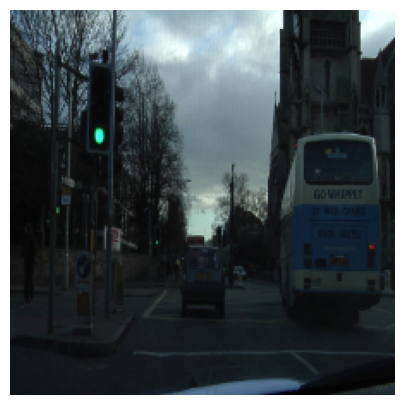

In [24]:
# Визуализируем случайную картинку
show(trn_ds[10][0])

Теперь нам необходимо воссоздать архитектуру сети для того чтобы обучиться на нашем датасете:

Для того, чтобы облегчить нам работу с построением архитектуры, создадим два отдельных блока, один из которых будет отвечать за операции в левой части U-Net архитектуры (то есть сжатие изображение), а другой будет отвечать за операции в правой части архитектуры (то есть апсемплинг):

In [25]:
# сверточный блок для левой части архитектуры

def convolve(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace = True)
    )

In [26]:
# апсемплинг блок для правой части архитектуры

def up_convolve(in_channels, out_channels):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size = 2, stride = 2),
        nn.ReLU(inplace = True)
    )

In [27]:
# Теперь определим всю архитектуру для U-Net:
from torchvision.models import vgg16_bn

class UNet(nn.Module):
    def __init__(self, pretrained=True, out_channels=12):
        super().__init__()
        # Будем использовать модель VGG-16 в качестве энкодера
        self.encoder = vgg16_bn(pretrained=pretrained).features
        # Разделим VGG поблочно на отдельные блоки чтобы было удобно их модифицировать и обращаться к ним
        self.block1 = nn.Sequential(*self.encoder[:6])
        self.block2 = nn.Sequential(*self.encoder[6:13])
        self.block3 = nn.Sequential(*self.encoder[13:20])
        self.block4 = nn.Sequential(*self.encoder[20:27])
        self.block5 = nn.Sequential(*self.encoder[27:34])
        
        # Боттлнек нашей архитектуры (самый глубокий уровень сети -> смотри архитектуру U-Net на картинке выше)
        self.bottleneck = nn.Sequential(*self.encoder[34:])
        self.conv_bottleneck = convolve(512, 1024)
        
        # Блоки декодера с "транспонированными свертками" и сверточными блоками
        self.up_conv6 = up_convolve(1024, 512)
        self.conv6 = convolve(512 + 512, 512)
        self.up_conv7 = up_convolve(512, 256)
        self.conv7 = convolve(256 + 512, 256)
        self.up_conv8 = up_convolve(256, 128)
        self.conv8 = convolve(128 + 256, 128)
        self.up_conv9 = up_convolve(128, 64)
        self.conv9 = convolve(64 + 128, 64)
        self.up_conv10 = up_convolve(64, 32)
        self.conv10 = convolve(32 + 64, 32)
        # Финальный сверточный слой для приведения к нужному числу каналов
        self.conv11 = nn.Conv2d(32, out_channels, kernel_size=1)
    
    def forward(self, x):
        # Проход через блоки энкодера
        block1 = self.block1(x)
        block2 = self.block2(block1)
        block3 = self.block3(block2)
        block4 = self.block4(block3)
        block5 = self.block5(block4)
        
        # Проход через блок боттлнека
        bottleneck = self.bottleneck(block5)
        x = self.conv_bottleneck(bottleneck)
        
        # Проход через блоки декодера с использованием "skip connections"
        x = self.up_conv6(x)
        x = torch.cat([x, block5], dim=1)
        x = self.conv6(x)

        x = self.up_conv7(x)
        x = torch.cat([x, block4], dim=1)
        x = self.conv7(x)

        x = self.up_conv8(x)
        x = torch.cat([x, block3], dim=1)
        x = self.conv8(x)

        x = self.up_conv9(x)
        x = torch.cat([x, block2], dim=1)
        x = self.conv9(x)

        x = self.up_conv10(x)
        x = torch.cat([x, block1], dim=1)
        x = self.conv10(x)
        
        # Проход через финальный свёрточный слой
        x = self.conv11(x)

        return x

Определим функцию потерь

In [28]:
ce = nn.CrossEntropyLoss()

def UnetLoss(preds, targets):
    ce_loss = ce(preds, targets)
    acc = (torch.max(preds, 1)[1] == targets).float().mean()
    return ce_loss, acc


Функции для тренировки на батче данных и расчет метрик для валидациии:

In [29]:
def train_batch(model, data, optimizer, criterion):
    model.train()
    ims, ce_masks = data
    _masks = model(ims)
    optimizer.zero_grad()
    loss, acc = criterion(_masks, ce_masks)
    loss.backward()
    optimizer.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    model.eval()
    ims, masks = data
    _masks = model(ims)
    loss, acc = criterion(_masks, masks)
    return loss.item(), acc.item()

Этап тренировки:

In [30]:
model = UNet().to(device)
criterion = UnetLoss
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 20

In [31]:
log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer,criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss,trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss,val_acc=acc, end='\r')
        
    log.report_avgs(ex+1)

EPOCH: 1.000  trn_acc: 0.739  val_loss: 0.902  trn_loss: 1.214  val_acc: 0.772  (11.08s - 210.44s remaining)
EPOCH: 2.000  trn_acc: 0.828  val_loss: 0.619  trn_loss: 0.690  val_acc: 0.851  (21.74s - 195.66s remaining)
EPOCH: 3.000  trn_acc: 0.842  val_loss: 0.548  trn_loss: 0.592  val_acc: 0.865  (32.47s - 183.99s remaining)
EPOCH: 4.000  trn_acc: 0.862  val_loss: 0.489  trn_loss: 0.509  val_acc: 0.873  (43.05s - 172.21s remaining)
EPOCH: 5.000  trn_acc: 0.867  val_loss: 0.479  trn_loss: 0.482  val_acc: 0.872  (53.64s - 160.91s remaining)
EPOCH: 6.000  trn_acc: 0.878  val_loss: 0.490  trn_loss: 0.437  val_acc: 0.859  (64.25s - 149.91s remaining)
EPOCH: 7.000  trn_acc: 0.883  val_loss: 0.512  trn_loss: 0.416  val_acc: 0.856  (74.82s - 138.96s remaining)
EPOCH: 8.000  trn_acc: 0.893  val_loss: 0.435  trn_loss: 0.377  val_acc: 0.866  (85.61s - 128.42s remaining)
EPOCH: 9.000  trn_acc: 0.893  val_loss: 0.466  trn_loss: 0.374  val_acc: 0.869  (96.48s - 117.93s remaining)
EPOCH: 10.000  trn_

100%|██████████| 121/121 [00:00<00:00, 1551.36it/s]


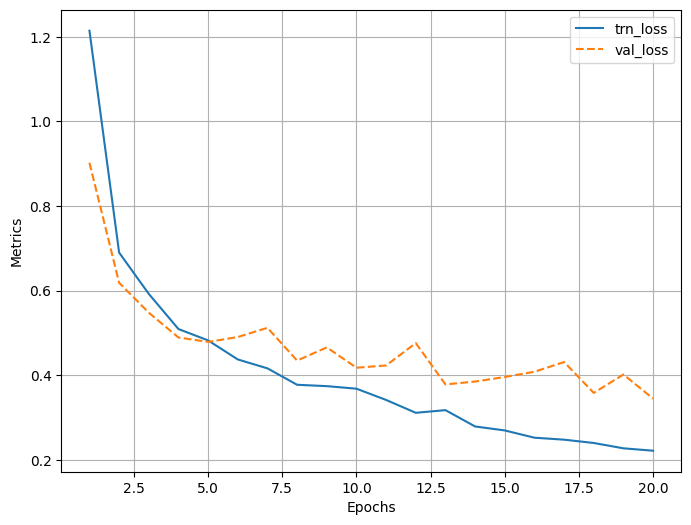

In [32]:
log.plot_epochs(['trn_loss','val_loss'])

Протестируем модель:

In [17]:
im, mask = next(iter(val_dl))
_mask = model(im)

In [18]:
# Заберем канал который имеет наивысшую вероятность
_, _mask = torch.max(_mask, dim=1)

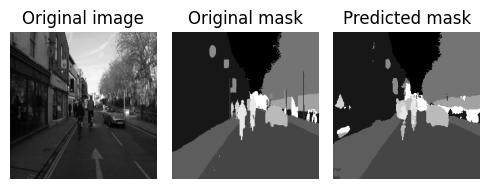

In [19]:
subplots([im[0].permute(1,2,0).detach().cpu()[:,:,0], mask.permute(1,2,0).detach().cpu()[:,:,0], \
          _mask.permute(1,2,0).detach().cpu()[:,:,0]],nc=3,titles=['Original image','Original mask', \
          'Predicted mask'])

мы можем успешно генерировать маску сегментации с помощью архитектуры U-Net.

[Пример Тренировки U-Net сегментации. Понадобится гпу!](https://www.kaggle.com/code/dhananjay3/image-segmentation-from-scratch-in-pytorch/notebook)

[Semantic Drone Dataset](https://www.tugraz.at/index.php?id=22387)